In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sn
import re
import os

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
#os.getcwd()
#df = pd.read_csv('Healthcare_Cost_by_Year.csv')

health_cost = pd.read_excel('Healthcare_Cost_by_Year.xlsx')

In [4]:
health_cost.head()

,Year,National Health Spending (Billions),Percent Growth,Cost Per Person,Event,Year.1,Inflation Rate YOY,Fed Funds Rate*,Business Cycle (GDP Growth),Events Affecting Inflation
0,1960.0,27.2,NaN,146.0,Recession,1960.0,0.014,0.0200,April peak (2.6%),Recession
1,1961.0,29.1,0.071,154.0,Recession ended,1961.0,0.007,0.0225,Feb. trough (2.6%),JFK's deficit spending ended recession
2,1962.0,31.8,0.093,166.0,NaN,1962.0,0.013,0.0300,Expansion (6.1%),NaN
3,1963.0,34.6,0.086,178.0,NaN,1963.0,0.016,0.0350,Expansion (4.4%),NaN
4,1964.0,38.4,0.110,194.0,LBJ started Medicare and Medicaid,1964.0,0.010,0.0375,Expansion (5.8%),"LBJ Medicare, Medicaid"


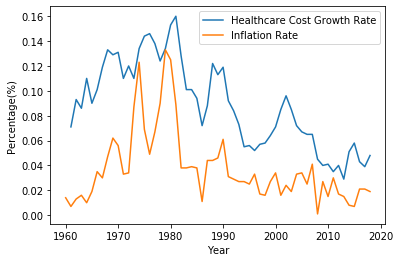

In [5]:
plt.plot(health_cost['Year'], health_cost['Percent Growth'], label = 'Healthcare Cost Growth Rate')
plt.plot(health_cost['Year'], health_cost['Inflation Rate YOY'], label = 'Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Percentage(%)')
plt.legend()
plt.show()

In [6]:
df1 = pd.read_csv('Medicare_Hospital_Spending_by_Claim.csv')
df2 = pd.read_csv('Hospital_Readmissions_Reduction_Program.csv')

In [115]:
df = df1.merge(df2, left_on=['Facility ID', 'Facility Name', 'State'], right_on = ['Facility ID', 'Facility Name', 'State'])

In [116]:
df.head()

,Facility ID,Facility Name,State,Period,Claim Type,Avg Spending Per Episode Hospital,Avg Spending Per Episode State,Avg Spending Per Episode Nation,Percent of Spending Hospital,Percent of Spending State,...,End Date_x,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date_y,End Date_y
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Home Health Agency,21,16,13,0.09%,0.08%,...,12/31/2018,READM-30-HIP-KNEE-HRRP,301.0,NaN,1.1787,5.5863,4.7392,20,07/01/2015,06/30/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Home Health Agency,21,16,13,0.09%,0.08%,...,12/31/2018,READM-30-CABG-HRRP,279.0,NaN,1.2361,14.5943,11.8065,46,07/01/2015,06/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Home Health Agency,21,16,13,0.09%,0.08%,...,12/31/2018,READM-30-AMI-HRRP,742.0,NaN,1.0446,15.2935,14.6404,116,07/01/2015,06/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Home Health Agency,21,16,13,0.09%,0.08%,...,12/31/2018,READM-30-HF-HRRP,1114.0,NaN,1.0453,22.3772,21.4082,252,07/01/2015,06/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Home Health Agency,21,16,13,0.09%,0.08%,...,12/31/2018,READM-30-COPD-HRRP,495.0,NaN,1.0249,18.6162,18.1637,94,07/01/2015,06/30/2018


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338976 entries, 0 to 338975
Data columns (total 22 columns):
Facility ID                          338976 non-null int64
Facility Name                        338976 non-null object
State                                338976 non-null object
Period                               338976 non-null object
Claim Type                           338976 non-null object
Avg Spending Per Episode Hospital    338976 non-null int64
Avg Spending Per Episode State       338976 non-null int64
Avg Spending Per Episode Nation      338976 non-null int64
Percent of Spending Hospital         338976 non-null object
Percent of Spending State            338976 non-null object
Percent of Spending Nation           338976 non-null object
Start Date_x                         338976 non-null object
End Date_x                           338976 non-null object
Measure Name                         338976 non-null object
Number of Discharges                 203720 non-null 

In [118]:
df.drop(columns=['Facility ID', 
                 'Start Date_x', 
                 'End Date_x', 
                 'Footnote', 
                 'Start Date_y', 
                 'End Date_y', 
                 'Excess Readmission Ratio',
                 'Predicted Readmission Rate',
                 'Expected Readmission Rate',
                 'Avg Spending Per Episode State',
                 'Avg Spending Per Episode Nation'
                ], inplace = True)

#df.fillna()
#a = pd.DataFrame(df1.info())

In [119]:
df.count().tail()

Percent of Spending State     338976
Percent of Spending Nation    338976
Measure Name                  338976
Number of Discharges          203720
Number of Readmissions        252846
dtype: int64

In [120]:
df.isna().sum()

Facility Name                             0
State                                     0
Period                                    0
Claim Type                                0
Avg Spending Per Episode Hospital         0
Percent of Spending Hospital              0
Percent of Spending State                 0
Percent of Spending Nation                0
Measure Name                              0
Number of Discharges                 135256
Number of Readmissions                86130
dtype: int64

In [121]:
df['Number of Readmissions'].value_counts(dropna = False).head()

NaN                  86130
Too Few to Report    50842
12                    5412
13                    5192
11                    5016
Name: Number of Readmissions, dtype: int64

In [122]:
df['Number of Discharges'].value_counts(dropna = False).head()

NaN      135256
0.0        1716
119.0       814
111.0       726
100.0       704
Name: Number of Discharges, dtype: int64

In [123]:
df['Number of Readmissions'] = pd.to_numeric(df['Number of Readmissions'], errors="coerce")
df['Percent of Spending Hospital'] = pd.to_numeric(df['Percent of Spending Hospital'].str.strip('%'), errors="coerce")


#df['Percent of Spending State'] = pd.to_numeric(df['Percent of Spending State'].str.strip('%'), errors="coerce")
#df['Percent of Spending Nation'] = pd.to_numeric(df['Percent of Spending Nation'].str.strip('%'), errors="coerce")
#df['Number of Readmissions'] = df['Number of Readmissions'].astype('str')
#df['Percent of Spending Hospital'] = df['Percent of Spending Hospital'].astype('str')
#df['Percent of Spending State'] = df['Percent of Spending State'].astype('str')
#df['Percent of Spending Nation'] = df['Percent of Spending Nation'].astype('str')

In [124]:
df.describe()

,Avg Spending Per Episode Hospital,Percent of Spending Hospital,Number of Discharges,Number of Readmissions
count,338976.000000,338976.000000,203720.000000,202004.000000
mean,1815.208263,9.090884,380.129266,60.795360
std,4548.274870,22.390812,351.321629,58.445966
min,0.000000,0.000000,0.000000,11.000000
25%,0.000000,0.000000,154.000000,22.000000
50%,68.000000,0.340000,280.000000,41.000000
75%,1006.000000,5.200000,492.000000,79.000000
max,37651.000000,100.000000,9356.000000,906.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338976 entries, 0 to 338975
Data columns (total 11 columns):
Facility Name                        338976 non-null object
State                                338976 non-null object
Period                               338976 non-null object
Claim Type                           338976 non-null object
Avg Spending Per Episode Hospital    338976 non-null int64
Percent of Spending Hospital         338976 non-null float64
Percent of Spending State            338976 non-null object
Percent of Spending Nation           338976 non-null object
Measure Name                         338976 non-null object
Number of Discharges                 203720 non-null float64
Number of Readmissions               202004 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 31.0+ MB


In [126]:
readmission = df.loc[:, ['Facility Name', 'State', 'Period', 'Claim Type', 'Avg Spending Per Episode Hospital', 'Number of Discharges', 'Number of Readmissions']]

#raw = df.loc[:, 'Facility Name', 'State', 'Period', 'Claim Type', 'Avg Spending Per Episode Hospital', 'Number of Discharges', 'Number of Readmissions']
len(readmission)

338976

In [127]:
readmission['Period_and_Claim'] = readmission['Period'] + readmission['Claim Type']

In [128]:
readmission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338976 entries, 0 to 338975
Data columns (total 8 columns):
Facility Name                        338976 non-null object
State                                338976 non-null object
Period                               338976 non-null object
Claim Type                           338976 non-null object
Avg Spending Per Episode Hospital    338976 non-null int64
Number of Discharges                 203720 non-null float64
Number of Readmissions               202004 non-null float64
Period_and_Claim                     338976 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 23.3+ MB


In [129]:
readmission.drop(columns=['Period', 'Claim Type'], inplace = True)

In [130]:
readmission1 = readmission.drop_duplicates()

In [131]:
readmission1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251893 entries, 0 to 338975
Data columns (total 6 columns):
Facility Name                        251893 non-null object
State                                251893 non-null object
Avg Spending Per Episode Hospital    251893 non-null int64
Number of Discharges                 203610 non-null float64
Number of Readmissions               201982 non-null float64
Period_and_Claim                     251893 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 13.5+ MB


In [132]:
readmission1.fillna(0, inplace = True)

C:\Users\blin261\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [133]:
readmission1['Number of Discharges'].value_counts(dropna = False).head()

0.0      49911
119.0      814
111.0      726
153.0      704
100.0      704
Name: Number of Discharges, dtype: int64

In [134]:
readmission1['Number of Readmissions'].value_counts(dropna = False).head()

0.0     49911
12.0     5412
13.0     5192
11.0     5016
16.0     4774
Name: Number of Readmissions, dtype: int64

In [135]:
total_discharge = readmission1['Number of Discharges'].groupby(readmission1['Facility Name']).sum()
#total_discharge.fillna(0)

total_readmissions = readmission1['Number of Readmissions'].groupby(readmission1['Facility Name']).sum()
#total_readmissions.fillna(0)

readmission_rate = total_readmissions / total_discharge

In [136]:
readmission_rate.head(10)

Facility Name
ABBEVILLE GENERAL HOSPITAL          0.147541
ABBOTT NORTHWESTERN HOSPITAL        0.147096
ABILENE REGIONAL MEDICAL CENTER     0.161720
ABINGTON MEMORIAL HOSPITAL          0.144444
ABRAZO CENTRAL CAMPUS               0.181507
ABRAZO SCOTTSDALE CAMPUS            0.150000
ABRAZO WEST CAMPUS                  0.169318
ACADIA GENERAL HOSPITAL             0.186520
ACMH HOSPITAL                       0.189781
ADCARE HOSPITAL OF WORCESTER INC         NaN
dtype: float64

In [137]:
readmission_rate.value_counts(dropna = False).head()

#total_discharge.value_counts(dropna = False).head()
#total_discharge.head(20)
#total_readmissions.head(20)

NaN         216
0.200000     10
0.166667      7
0.181818      4
0.206897      3
dtype: int64

In [138]:
readmission2 = readmission1.groupby(['Facility Name', 'Period_and_Claim'])['Avg Spending Per Episode Hospital'].aggregate('mean').unstack()

#readmission2['State'] = readmission1.groupby(['Facility Name', 'Period_and_Claim']).transform('State')
#raw1.groupby(['Facility Name', 'Period_and_Claim'])['Number of Discharges', 'Number of Readmissions'].aggregate('sum').unstack()
#origin.pivot_table(values='value', index='label', columns='type')

In [139]:
readmission2['readmission_rate'] = readmission_rate

In [140]:
readmission3 = readmission2.merge(readmission1[['Facility Name', 'State']], left_on=['Facility Name'], right_on = ['Facility Name'])

In [141]:
readmission3 = readmission3.drop_duplicates()

In [143]:
readmission3.rename(columns={'1 through 30 days After Discharge from Index Hospital AdmissionCarrier': 'after_carrier',
                             '1 through 30 days After Discharge from Index Hospital AdmissionDurable Medical Equipment': 'after_durable_medical_equipment',
                             '1 through 30 days After Discharge from Index Hospital AdmissionHome Health Agency': 'after_home_health_agency',
                             '1 through 30 days After Discharge from Index Hospital AdmissionHospice': 'after_hospice',
                             '1 through 30 days After Discharge from Index Hospital AdmissionInpatient': 'after_inpatient',
                             '1 through 30 days After Discharge from Index Hospital AdmissionOutpatient': 'after_outpatient',
                             '1 through 30 days After Discharge from Index Hospital AdmissionSkilled Nursing Facility': 'after_skilled_nursing_facility',
                             '1 to 3 days Prior to Index Hospital AdmissionCarrier': 'prior_carrier',
                             '1 to 3 days Prior to Index Hospital AdmissionDurable Medical Equipment': 'prior_durable_medical_equipment',
                             '1 to 3 days Prior to Index Hospital AdmissionHome Health Agency': 'prior_home_health_agency',
                             '1 to 3 days Prior to Index Hospital AdmissionHospice': 'prior_hospice',
                             '1 to 3 days Prior to Index Hospital AdmissionInpatient': 'prior_inpatient',
                             '1 to 3 days Prior to Index Hospital AdmissionOutpatient': 'prior_outpatient',
                             '1 to 3 days Prior to Index Hospital AdmissionSkilled Nursing Facility': 'prior_skilled_nursing_facility',
                             'Complete EpisodeTotal': 'complete_episode',
                             'During Index Hospital AdmissionCarrier': 'index_carrier',
                             'During Index Hospital AdmissionDurable Medical Equipment': 'index_durable_medical_equipment',
                             'During Index Hospital AdmissionHome Health Agency': 'index_home_health_agency',
                             'During Index Hospital AdmissionHospice': 'index_hospice',
                             'During Index Hospital AdmissionInpatient': 'index_inpatient',
                             'During Index Hospital AdmissionOutpatient': 'index_outpatient',
                             'During Index Hospital AdmissionSkilled Nursing Facility': 'index_skilled_nursing_facility'
                            }, inplace = True)

In [144]:
readmission3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2562 entries, 0 to 251871
Data columns (total 25 columns):
Facility Name                      2562 non-null object
after_carrier                      2562 non-null float64
after_durable_medical_equipment    2562 non-null float64
after_home_health_agency           2562 non-null float64
after_hospice                      2562 non-null float64
after_inpatient                    2562 non-null float64
after_outpatient                   2562 non-null float64
after_skilled_nursing_facility     2562 non-null float64
prior_carrier                      2562 non-null float64
prior_durable_medical_equipment    2562 non-null float64
prior_home_health_agency           2562 non-null float64
prior_hospice                      2562 non-null float64
prior_inpatient                    2562 non-null float64
prior_outpatient                   2562 non-null float64
prior_skilled_nursing_facility     2562 non-null float64
complete_episode                   25

In [35]:
readmission3.head()

,Facility Name,after_carrier,after_durable_medical_equipment,after_home_health_agency,after_hospice,after_inpatient,after_outpatient,after_skilled_nursing_facility,prior_carrier,prior_durable_medical_equipment,...,complete_episode,index_carrier,index_durable_medical_equipment,index_home_health_agency,index_hospice,index_inpatient,index_outpatient,index_skilled_nursing_facility,readmission_rate,State
0,ABBEVILLE GENERAL HOSPITAL,1047.0,40.0,646.0,404.0,3354.0,954.0,5907.0,536.0,8.0,...,21917.0,927.0,51.0,0.0,0.0,7974.0,0.0,0.0,0.147541,LA
66,ABBOTT NORTHWESTERN HOSPITAL,967.0,100.0,553.0,103.0,2144.0,973.0,2367.0,393.0,6.0,...,23223.0,2118.0,16.0,0.0,0.0,12863.0,0.0,0.0,0.147096,MN
198,ABILENE REGIONAL MEDICAL CENTER,997.0,69.0,1025.0,170.0,5357.0,718.0,3056.0,592.0,8.0,...,24514.0,1535.0,13.0,0.0,0.0,10735.0,0.0,0.0,0.161720,TX
308,ABINGTON MEMORIAL HOSPITAL,1280.0,72.0,994.0,135.0,2210.0,663.0,3176.0,659.0,5.0,...,19505.0,1435.0,10.0,0.0,0.0,8787.0,0.0,0.0,0.144444,PA
440,ABRAZO CENTRAL CAMPUS,1428.0,51.0,703.0,309.0,3356.0,793.0,3169.0,872.0,4.0,...,22504.0,2024.0,40.0,0.0,0.0,9501.0,0.0,0.0,0.181507,AZ


In [36]:
readmission3.describe()

,after_carrier,after_durable_medical_equipment,after_home_health_agency,after_hospice,after_inpatient,after_outpatient,after_skilled_nursing_facility,prior_carrier,prior_durable_medical_equipment,prior_home_health_agency,...,prior_skilled_nursing_facility,complete_episode,index_carrier,index_durable_medical_equipment,index_home_health_agency,index_hospice,index_inpatient,index_outpatient,index_skilled_nursing_facility,readmission_rate
count,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,...,2562.000000,2562.000000,2562.000000,2562.000000,2562.0,2562.0,2562.000000,2562.0,2562.0,2346.000000
mean,1050.690031,84.279468,781.304547,155.836882,2559.866725,784.704997,3240.481674,526.446765,7.645706,12.989972,...,2.178205,19970.703230,1292.684507,18.873706,0.0,0.0,9327.931733,0.0,0.0,0.167798
std,322.491817,61.209256,326.666745,91.810554,1151.646183,290.584005,1314.362190,155.327305,8.976624,12.500736,...,2.968805,3410.545885,520.417022,31.996638,0.0,0.0,2211.067220,0.0,0.0,0.045579
min,169.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,18.000000,0.000000,0.000000,...,0.000000,6913.000000,0.000000,0.000000,0.0,0.0,4324.000000,0.0,0.0,0.019718
25%,819.000000,56.250000,588.000000,100.000000,1769.250000,599.818182,2497.000000,455.250000,4.000000,5.000000,...,0.000000,17875.000000,927.000000,9.000000,0.0,0.0,7971.800000,0.0,0.0,0.143009
50%,1029.000000,75.000000,778.000000,146.000000,2376.000000,761.000000,3154.500000,539.071429,6.000000,11.000000,...,2.000000,20123.500000,1317.125000,14.000000,0.0,0.0,9058.000000,0.0,0.0,0.168876
75%,1264.750000,97.000000,945.750000,201.000000,3154.100000,919.000000,3946.000000,603.000000,9.000000,18.000000,...,3.000000,22058.250000,1604.750000,22.000000,0.0,0.0,10290.750000,0.0,0.0,0.195520
max,2528.000000,1568.000000,3561.000000,746.000000,8977.000000,4404.000000,13817.000000,1840.000000,223.000000,248.000000,...,46.000000,37651.000000,5016.000000,1246.000000,0.0,0.0,27581.000000,0.0,0.0,0.361111


In [37]:
readmission3.drop(columns=['index_home_health_agency', 'index_hospice', 'index_outpatient', 'index_skilled_nursing_facility'], inplace = True)
readmission3.dropna(inplace = True)

In [42]:
temp = readmission3.groupby('State')['readmission_rate'].aggregate('mean')
temp.to_frame()
print(temp.head(10))
temp.sort_values(inplace=True)

State
AK    0.152701
AL    0.170894
AR    0.169058
AZ    0.138231
CA    0.177527
CO    0.125604
CT    0.164015
DC    0.196796
DE    0.140321
FL    0.186488
Name: readmission_rate, dtype: float64


Text(0, 0.5, 'Readmission Rate')

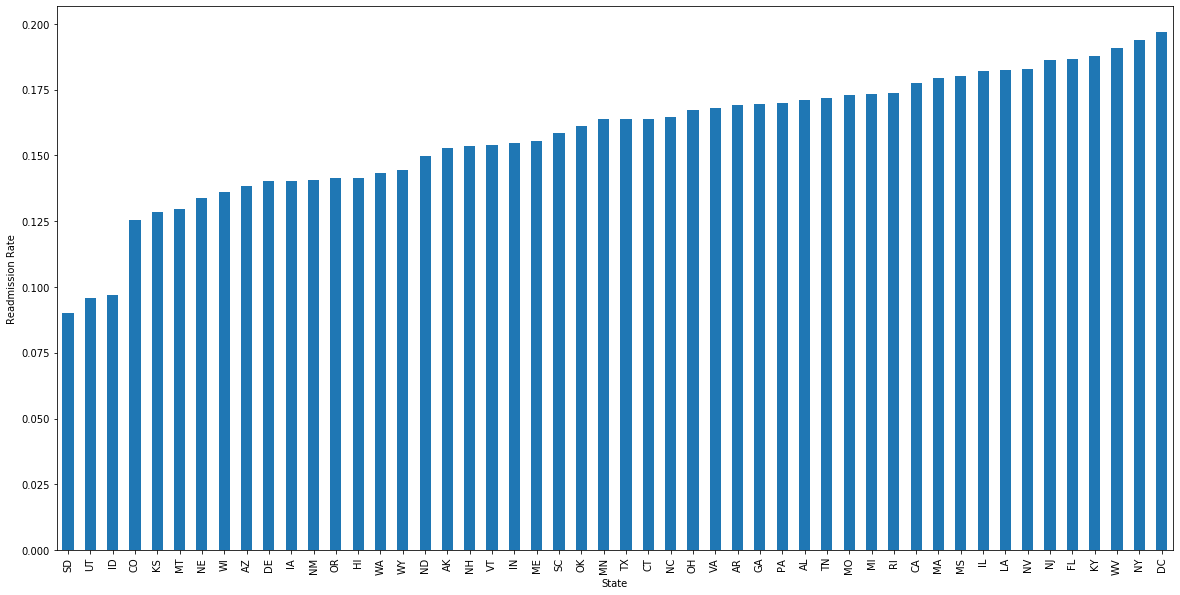

In [43]:
%matplotlib inline
plt.figure(figsize=(20,10))
ax = temp.plot(kind='bar')
ax.set_ylabel('Readmission Rate')
#plt.bar(x = temp, label = 'Readmission Rate')
#plt.show()

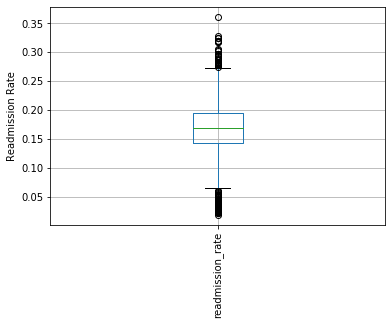

In [148]:
%matplotlib inline
ax = readmission3[['readmission_rate']].boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel("Readmission Rate")
plt.show()

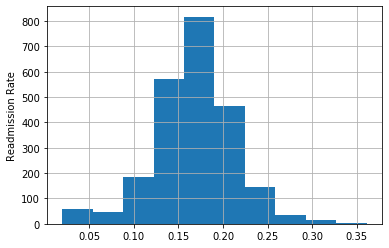

In [150]:
%matplotlib inline
readmission3['readmission_rate'].hist()
plt.ylabel("Readmission Rate")
plt.show()

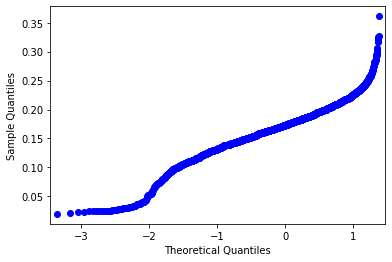

In [154]:
from statsmodels.graphics.gofplots import qqplot

qqplot(readmission3['readmission_rate'], line='s')
plt.show()

[Text(0, 0, 'after_carrier'),
 Text(0, 0, 'after_durable_medical_equipment'),
 Text(0, 0, 'after_home_health_agency'),
 Text(0, 0, 'after_hospice'),
 Text(0, 0, 'after_inpatient'),
 Text(0, 0, 'after_outpatient'),
 Text(0, 0, 'after_skilled_nursing_facility'),
 Text(0, 0, 'prior_carrier'),
 Text(0, 0, 'prior_durable_medical_equipment'),
 Text(0, 0, 'prior_home_health_agency'),
 Text(0, 0, 'prior_hospice'),
 Text(0, 0, 'prior_inpatient'),
 Text(0, 0, 'prior_outpatient'),
 Text(0, 0, 'prior_skilled_nursing_facility'),
 Text(0, 0, 'complete_episode'),
 Text(0, 0, 'index_carrier'),
 Text(0, 0, 'index_durable_medical_equipment'),
 Text(0, 0, 'index_inpatient'),
 Text(0, 0, 'readmission_rate')]

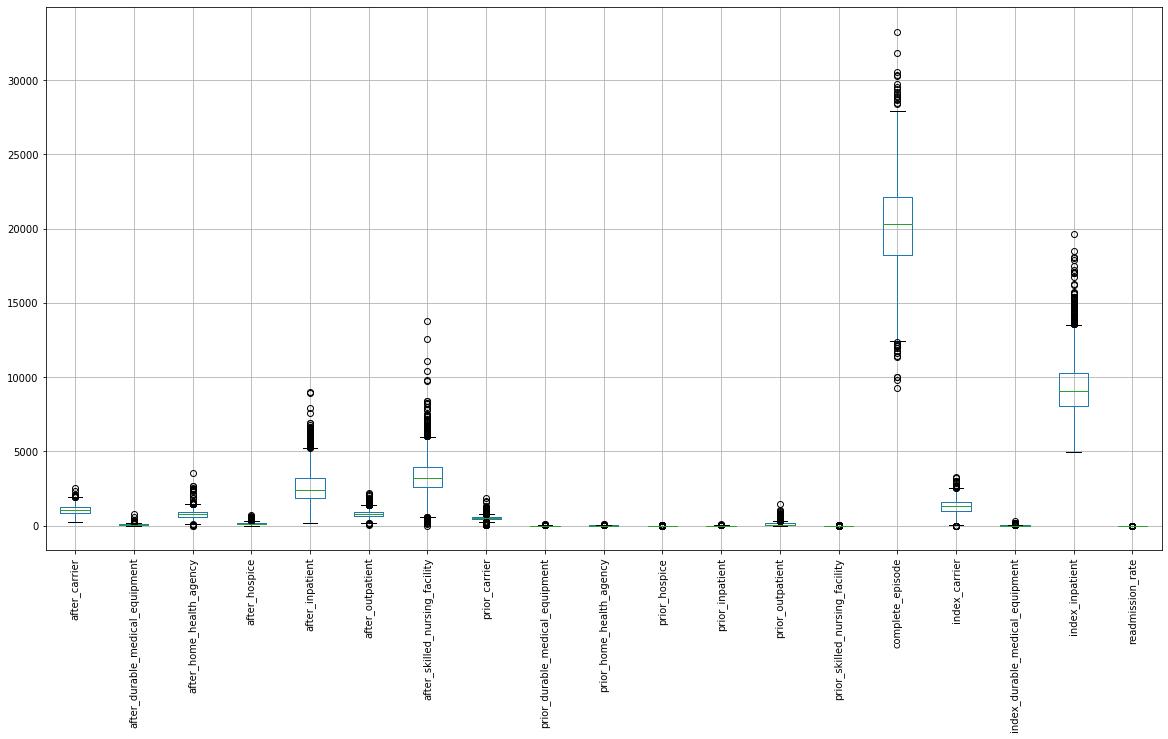

In [44]:
%matplotlib inline
plt.figure(figsize=(20,10))
ax = readmission3.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

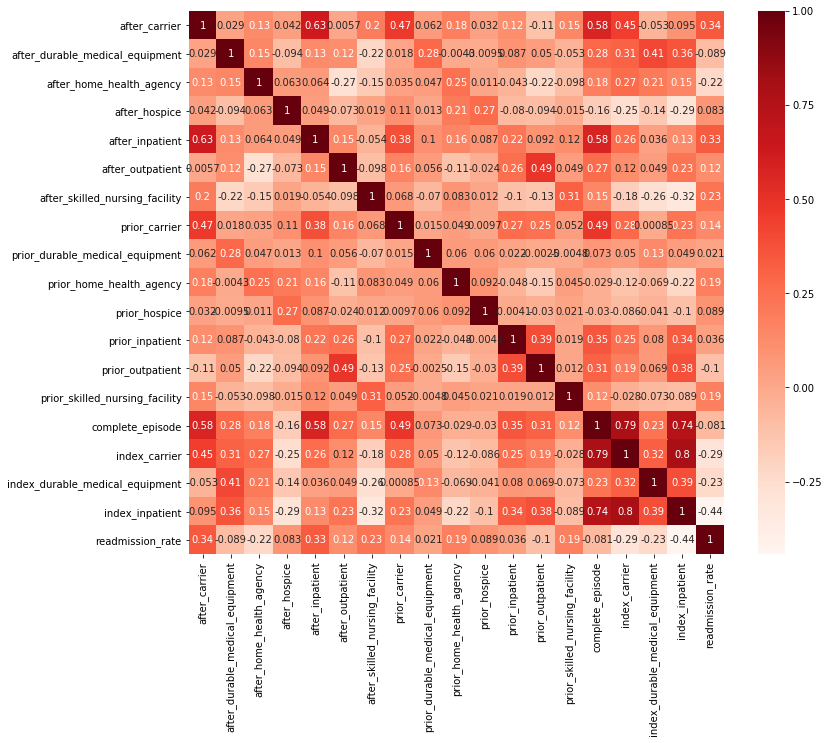

In [45]:
correlation_matrix = readmission3.corr()

#Using Pearson Correlation
plt.figure(figsize=(12,10))
sn.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
feature_names = list(readmission3.columns.values)
feature_names.remove('Facility Name')
feature_names.remove('State')
feature_names.remove('readmission_rate')
X = readmission3[feature_names]
Y = readmission3['readmission_rate']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, index=readmission3[feature_names].index, columns=readmission3[feature_names].columns)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [197]:
# Initialise and fit model
lm_model = LinearRegression()
lm_model = lm_model.fit(X_train, Y_train)

In [198]:
Y_pred = lm_model.predict(X_test)

In [199]:
print(f'alpha = {lm_model.intercept_}')
print(f'betas = {lm_model.coef_}')

alpha = 0.1678751983882069
betas = [ 0.18282984  0.02672959  0.14618193  0.03971957  0.60215549  0.14474436
  0.64743152  0.07645032  0.00203534  0.00829776  0.00226031  0.00827433
  0.06352284  0.00306188 -1.60875638  0.23959058  0.00744035  0.99521226]


In [200]:
coeff_df = pd.DataFrame(lm_model.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
after_carrier,0.182830
after_durable_medical_equipment,0.026730
after_home_health_agency,0.146182
after_hospice,0.039720
after_inpatient,0.602155
after_outpatient,0.144744
after_skilled_nursing_facility,0.647432
prior_carrier,0.076450
prior_durable_medical_equipment,0.002035
prior_home_health_agency,0.008298


In [201]:
print('Score:', lm_model.score(X_test, Y_test))

Score: 0.4756466890871869


In [202]:
lm_scores = cross_val_score(lm_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(lm_scores))

Mean Cross-validated scores: 0.45130855458237634


In [203]:
Y_pred = cross_val_predict(lm_model, X, Y, cv=10)

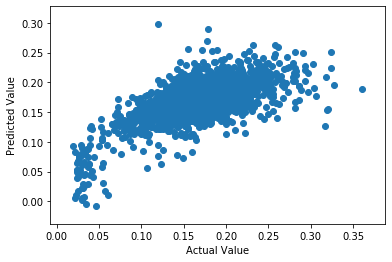

In [204]:
plt.scatter(Y, Y_pred)
plt.xlabel("Actual Value")
plt.ylabel('Predicted Value')
plt.show()

In [205]:
#print(explained_variance_score(Y, Y_pred))

print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

linear_regression = [round(r2_score(Y, Y_pred), 3), 
                     round(mean_absolute_error(Y, Y_pred), 3), 
                     round(mean_squared_error(Y, Y_pred), 3),
                     round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: 0.4658689444977252
Mean Absolute Error: 0.025316375788329945
Mean Squared Error: 0.0011091736487517767
Root Mean Squared Error: 0.033304258717944416


Text(0.5, 1.0, 'Residual plot')

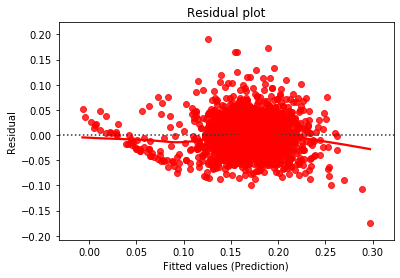

In [181]:
#sn.residplot(predictions.reshape(-1),'waiting', data=faithful,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})

sn.residplot(Y_pred, Y, lowess=True, color="r")
plt.xlabel("Fitted values (Prediction)")
plt.ylabel('Residual')
plt.title('Residual plot')

In [182]:
residuals = Y_pred - Y

Text(0.5, 1.0, 'Normal Q-Q Plot')

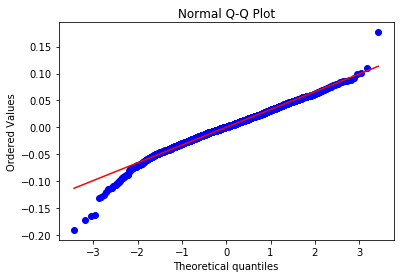

In [183]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

In [184]:
rf_model = RandomForestRegressor(max_depth=3, random_state=1)
rf_scores = cross_val_score(rf_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(rf_scores))

Mean Cross-validated scores: 0.38528439963470423


In [185]:
Y_pred = cross_val_predict(rf_model, X, Y, cv=10)

In [186]:
print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

random_forest = [round(r2_score(Y, Y_pred), 3),
                 round(mean_absolute_error(Y, Y_pred), 3), 
                 round(mean_squared_error(Y, Y_pred), 3),
                 round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: 0.39759060994966666
Mean Absolute Error: 0.026938562009421838
Mean Squared Error: 0.0012509600674241543
Root Mean Squared Error: 0.03536891385700378


In [187]:
svm_model = svm.SVR()
svm_scores = cross_val_score(rf_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(svm_scores))

Mean Cross-validated scores: 0.38528439963470423


In [188]:
Y_pred = cross_val_predict(svm_model, X, Y, cv=10)

In [189]:
print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

svm = [round(r2_score(Y, Y_pred), 3), 
                     round(mean_absolute_error(Y, Y_pred), 3), 
                     round(mean_squared_error(Y, Y_pred), 3),
                     round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: 0.17307984204046412
Mean Absolute Error: 0.03222995579254723
Mean Squared Error: 0.0017171779086461818
Root Mean Squared Error: 0.04143884540676998


In [190]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_scores = cross_val_score(knn_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(knn_scores))

Mean Cross-validated scores: 0.3398888318154533


In [191]:
Y_pred = cross_val_predict(knn_model, X, Y, cv=10)

In [192]:
print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

knn = [round(r2_score(Y, Y_pred), 3), 
                     round(mean_absolute_error(Y, Y_pred), 3), 
                     round(mean_squared_error(Y, Y_pred), 3),
                     round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: 0.3555917492311963
Mean Absolute Error: 0.028112170846891046
Mean Squared Error: 0.0013381746734775653
Root Mean Squared Error: 0.03658106987879886


In [193]:
mlp_model = MLPRegressor()
mlp_scores = cross_val_score(mlp_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(mlp_scores))


Mean Cross-validated scores: -1.6147028981210556


In [194]:
Y_pred = cross_val_predict(mlp_model, X, Y, cv=10)

In [196]:
print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

mlp = [round(r2_score(Y, Y_pred), 3), 
                     round(mean_absolute_error(Y, Y_pred), 3), 
                     round(mean_squared_error(Y, Y_pred), 3),
                     round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: -1.4247409822605142
Mean Absolute Error: 0.05339618462494649
Mean Squared Error: 0.005035203953911283
Root Mean Squared Error: 0.07095917103455537


In [206]:
#kernel = DotProduct() + WhiteKernel()
#gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=1)

gpr_model = GaussianProcessRegressor()
gpr_scores = cross_val_score(gpr_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(gpr_scores))

Mean Cross-validated scores: -4.535151153157679


In [207]:
Y_pred = cross_val_predict(gpr_model, X, Y, cv=10)

In [210]:
print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

gaussiant_processor = [round(r2_score(Y, Y_pred), 3), 
                     round(mean_absolute_error(Y, Y_pred), 3), 
                     round(mean_squared_error(Y, Y_pred), 3),
                     round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: -4.318720326230867
Mean Absolute Error: 0.08248641761270654
Mean Squared Error: 0.011044825741106165
Root Mean Squared Error: 0.10509436588659815


In [211]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
gbr_scores = cross_val_score(gbr_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(gbr_scores))

Mean Cross-validated scores: 0.41802720188366155


In [212]:
Y_pred = cross_val_predict(gbr_model, X, Y, cv=10)

In [213]:
print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

gradient_boosting = [round(r2_score(Y, Y_pred), 3), 
                     round(mean_absolute_error(Y, Y_pred), 3), 
                     round(mean_squared_error(Y, Y_pred), 3),
                     round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: 0.43083854693812607
Mean Absolute Error: 0.026402620825619928
Mean Squared Error: 0.0011819175820583104
Root Mean Squared Error: 0.03437902823027886


In [214]:
estimators=[('Linear Regression', lm_model), 
            ('Random Forest', rf_model), 
            ('SVM', svm_model), 
            ('KNN', knn_model), 
            ('Neural Network', mlp_model), 
            ('Gaussian Process', gpr_model), 
            ('Gardient Boosting', svm_model)]

voting_model = VotingRegressor(estimators)

In [215]:
voting_scores = cross_val_score(voting_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(voting_scores))

Mean Cross-validated scores: 0.29852056345604777


In [216]:
Y_pred = cross_val_predict(voting_model, X, Y, cv=10)

In [217]:
print('Model Accuracy R^2:', r2_score(Y, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, Y_pred)))

voting_regression = [round(r2_score(Y, Y_pred), 3), 
                     round(mean_absolute_error(Y, Y_pred), 3), 
                     round(mean_squared_error(Y, Y_pred), 3),
                     round(np.sqrt(metrics.mean_squared_error(Y, Y_pred)), 3)]

Model Accuracy R^2: 0.3170853471229488
Mean Absolute Error: 0.028728339018211344
Mean Squared Error: 0.0014181368589500894
Root Mean Squared Error: 0.03765815793357515


In [233]:
parameters = ['R^2', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']

output = pd.DataFrame(np.column_stack([parameters, 
                                       linear_regression, 
                                       knn, 
                                       svm,
                                       mlp, 
                                       gaussiant_processor, 
                                       random_forest,
                                       gradient_boosting, 
                                       voting_regression]), 
                      columns=['Parameters', 'Linear Regression', 'KNN', 'SVM', 'MLP', 'Gaussiant Processor',
                              'Random Forest', 'Gradient Boosting', 'Voting Regression'])

In [234]:
output

,Parameters,Linear Regression,KNN,SVM,MLP,Gaussiant Processor,Random Forest,Gradient Boosting,Voting Regression
0,R^2,0.466,0.356,0.173,-1.425,-4.319,0.398,0.431,0.317
1,Mean Absolute Error,0.025,0.028,0.032,0.053,0.082,0.027,0.026,0.029
2,Mean Squared Error,0.001,0.001,0.002,0.005,0.011,0.001,0.001,0.001
3,Root Mean Squared Error,0.033,0.037,0.041,0.071,0.105,0.035,0.034,0.038


In [91]:
state = pd.read_csv('State_Drug_Utilization_Data_2019.csv', engine='python')
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578549 entries, 0 to 3578548
Data columns (total 20 columns):
Utilization Type                  object
State                             object
Labeler Code                      int64
Product Code                      int64
Package Size                      int64
Year                              int64
Quarter                           int64
Product Name                      object
Suppression Used                  bool
Units Reimbursed                  float64
Number of Prescriptions           float64
Total Amount Reimbursed           float64
Medicaid Amount Reimbursed        float64
Non Medicaid Amount Reimbursed    float64
Quarter Begin                     object
Quarter Begin Date                object
Latitude                          float64
Longitude                         float64
Location                          object
NDC                               int64
dtypes: bool(1), float64(7), int64(6), object(6)
memory usage: 522.2

In [235]:
state = state.loc[:, ['Utilization Type', 'State', 'Product Name', 'Units Reimbursed', 'Total Amount Reimbursed']]
print(state.head())

  Utilization Type State Product Name  Units Reimbursed  \
0             MCOU    XX   NICOTINE 7           13160.0   
1             FFSU    IL   BUMETANIDE               NaN   
2             FFSU    XX   LIOTHYRONI             795.0   
3             MCOU    NY   QUETIAPINE               NaN   
4             MCOU    IN    OFLOXACIN               NaN   

   Total Amount Reimbursed  
0                 16209.76  
1                      NaN  
2                   408.00  
3                      NaN  
4                      NaN  


In [236]:
raw = state.dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652088 entries, 0 to 3048982
Data columns (total 5 columns):
Utilization Type           1652088 non-null object
State                      1652088 non-null object
Product Name               1652088 non-null object
Units Reimbursed           1652088 non-null float64
Total Amount Reimbursed    1652088 non-null float64
dtypes: float64(2), object(3)
memory usage: 75.6+ MB


In [237]:
mcou = raw[raw['Utilization Type'] == 'MCOU']
ffsu = raw[raw['Utilization Type'] == 'FFSU']

In [238]:
mcou = mcou.groupby('Product Name')['Units Reimbursed', 'Total Amount Reimbursed'].aggregate('sum')
ffsu = ffsu.groupby('Product Name')['Units Reimbursed', 'Total Amount Reimbursed'].aggregate('sum')

In [239]:
mcou['unit_price'] = mcou['Total Amount Reimbursed'] / mcou['Units Reimbursed']
ffsu['unit_price'] = ffsu['Total Amount Reimbursed'] / ffsu['Units Reimbursed']

In [240]:
mcou = mcou.reset_index()
ffsu = ffsu.reset_index()

In [241]:
mcou.head(10)

,Product Name,Units Reimbursed,Total Amount Reimbursed,unit_price
0,** FROM CL,1.372700e+05,38950.34,0.283750
1,.12% CHLOR,1.037102e+08,1134941.18,0.010943
2,0.075% KCL,1.202000e+04,42.24,0.003514
3,0.15% KCL,2.919732e+06,546268.60,0.187095
4,0.25 ACETI,7.665300e+05,3772.17,0.004921
5,0.25% ACET,3.303080e+05,1246.03,0.003772
6,0.4% LIDOC,2.429535e+05,386922.48,1.592578
7,0.45% SODI,1.618572e+06,5308.05,0.003279
8,0.8% LIDOC,2.592850e+04,83269.94,3.211522
9,0.9% NACL,2.669100e+05,9392.99,0.035192


In [242]:
total = mcou.merge(ffsu, left_on=['Product Name'], right_on = ['Product Name'])

In [243]:
total.head()

,Product Name,Units Reimbursed_x,Total Amount Reimbursed_x,unit_price_x,Units Reimbursed_y,Total Amount Reimbursed_y,unit_price_y
0,** FROM CL,1.372700e+05,38950.34,0.283750,1.396840e+05,18925.51,0.135488
1,.12% CHLOR,1.037102e+08,1134941.18,0.010943,3.522629e+07,779744.40,0.022135
2,0.15% KCL,2.919732e+06,546268.60,0.187095,1.176864e+06,40441.76,0.034364
3,0.25 ACETI,7.665300e+05,3772.17,0.004921,1.773058e+06,18913.69,0.010667
4,0.25% ACET,3.303080e+05,1246.03,0.003772,8.230000e+05,7321.19,0.008896


In [244]:
total.rename(columns={'Units Reimbursed_x': 'units_reimbursed_mcou',
                      'Total Amount Reimbursed_x': 'total_amount_reimbursed_mcou',
                      'unit_price_x': 'unit_price_mcou',
                      'Units Reimbursed_y': 'units_reimbursed_ffsu',
                      'Total Amount Reimbursed_y': 'total_amount_reimbursed_ffsu',
                      'unit_price_y': 'unit_price_ffsu'
                     }, inplace = True)

In [245]:
print(total.head())

  Product Name  units_reimbursed_mcou  total_amount_reimbursed_mcou  \
0   ** FROM CL           1.372700e+05                      38950.34   
1   .12% CHLOR           1.037102e+08                    1134941.18   
2    0.15% KCL           2.919732e+06                     546268.60   
3   0.25 ACETI           7.665300e+05                       3772.17   
4   0.25% ACET           3.303080e+05                       1246.03   

   unit_price_mcou  units_reimbursed_ffsu  total_amount_reimbursed_ffsu  \
0         0.283750           1.396840e+05                      18925.51   
1         0.010943           3.522629e+07                     779744.40   
2         0.187095           1.176864e+06                      40441.76   
3         0.004921           1.773058e+06                      18913.69   
4         0.003772           8.230000e+05                       7321.19   

   unit_price_ffsu  
0         0.135488  
1         0.022135  
2         0.034364  
3         0.010667  
4         0.00889

In [246]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 7801
Data columns (total 7 columns):
Product Name                    7802 non-null object
units_reimbursed_mcou           7802 non-null float64
total_amount_reimbursed_mcou    7802 non-null float64
unit_price_mcou                 7802 non-null float64
units_reimbursed_ffsu           7802 non-null float64
total_amount_reimbursed_ffsu    7802 non-null float64
unit_price_ffsu                 7802 non-null float64
dtypes: float64(6), object(1)
memory usage: 487.6+ KB


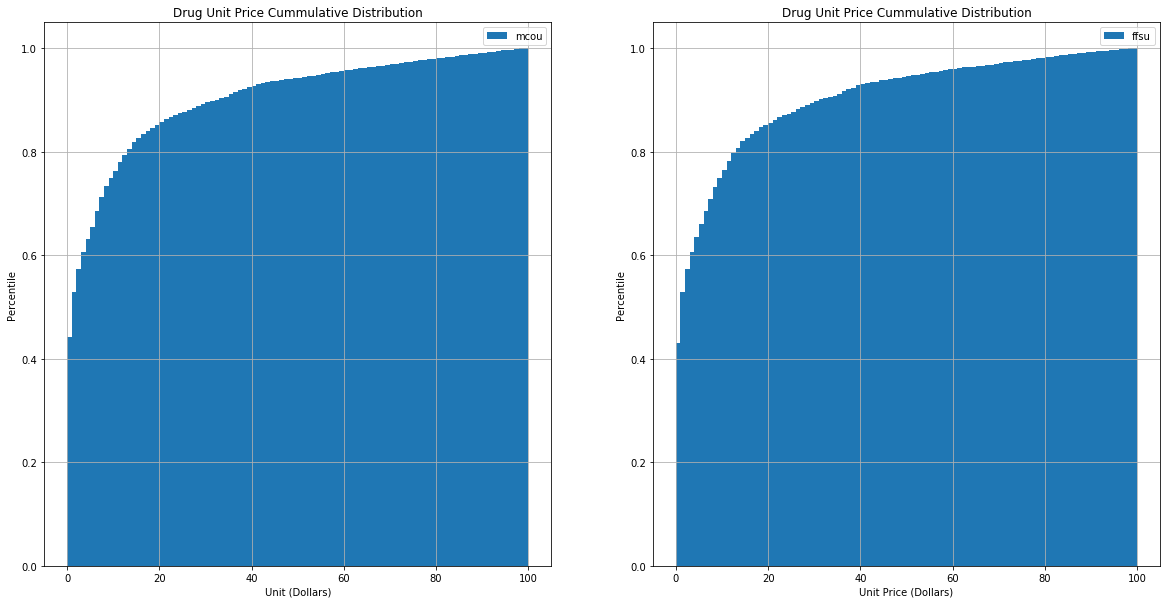

In [105]:
#fig = plt.figure()

%matplotlib inline
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
total['unit_price_mcou'].hist(bins = 100, range = [0, 100], cumulative = True, normed = True, label = 'mcou')
plt.xlabel('Unit (Dollars)')
plt.ylabel('Percentile')
plt.title('Drug Unit Price Cummulative Distribution')
plt.legend()

plt.subplot(1, 2, 2)
total['unit_price_ffsu'].hist(bins = 100, range = [0, 100], cumulative = True, normed = True, label = 'ffsu')
plt.xlabel('Unit Price (Dollars)')
plt.ylabel('Percentile')
plt.title('Drug Unit Price Cummulative Distribution')
plt.legend()
plt.show()

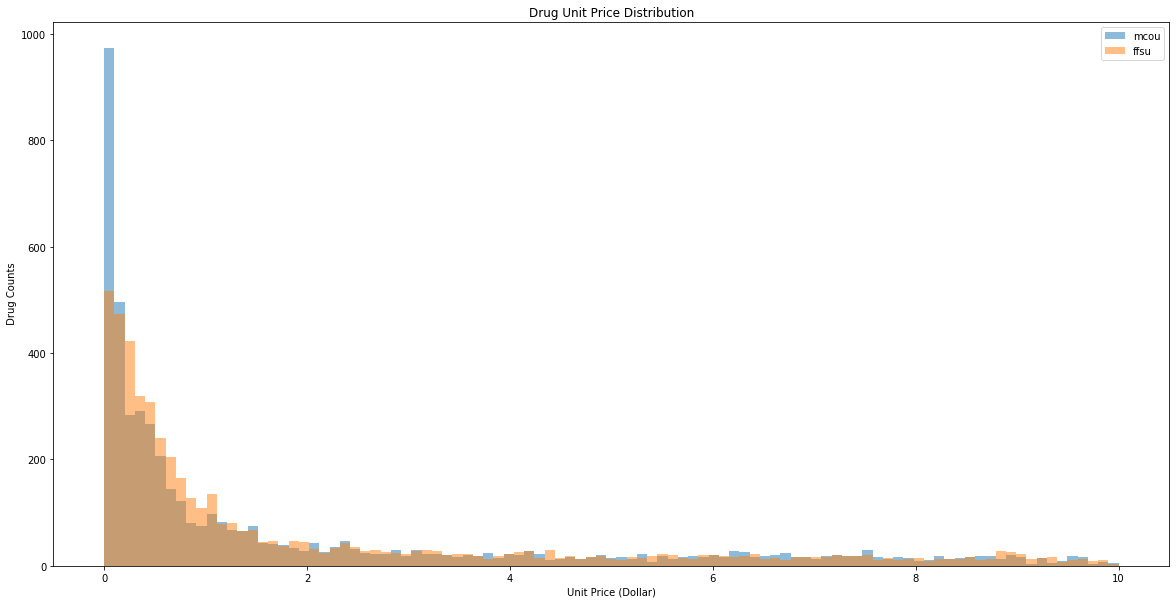

In [103]:
bins = np.linspace(0, 10, 100)
plt.figure(figsize=(20,10))
plt.hist(total['unit_price_mcou'], bins, alpha=0.5, label='mcou')
plt.hist(total['unit_price_ffsu'], bins, alpha=0.5, label='ffsu')
plt.legend(loc='upper right')
plt.xlabel('Unit Price (Dollar)')
plt.ylabel(' Drug Counts')
plt.title('Drug Unit Price Distribution')
plt.show()

In [252]:
from scipy.stats import ttest_ind
import statsmodels.stats.api as sms

mcou_mean = np.mean(total['unit_price_mcou'])
ffsu_mean = np.mean(total['unit_price_ffsu'])

print("Managed Care Organization mean unit price:", mcou_mean)
print("Fee for Service mean unit price:", ffsu_mean)

mcou_std = np.std(total['unit_price_mcou'])
ffsu_std = np.std(total['unit_price_ffsu'])

print("Managed Care Organization unit price standard deviation:", mcou_std)
print("Fee for Service unit price standard deviation:", ffsu_std)

Managed Care Organization mean unit price: 252.64771403609996
Fee for Service mean unit price: 284.3316189717122
Managed Care Organization unit price standard deviation: 1631.6444939455073
Fee for Service unit price standard deviation: 4152.241952381325


In [253]:
ttest, pval = ttest_ind(total['unit_price_mcou'], total['unit_price_ffsu'])
print('t statistics: ', ttest)
print("p-value: ", pval)

if pval < 0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

t statistics:  -0.6272641341087188
p-value:  0.530495288515858
we accept null hypothesis


In [258]:
cm = sms.CompareMeans(sms.DescrStatsW(total['unit_price_mcou']), sms.DescrStatsW(total['unit_price_ffsu']))
print('95% confidence interval: ', cm.tconfint_diff(usevar='unequal'))

#cm = sms.CompareMeans(mcou_mean, ffsu_mean)
#print(cm.tconfint_diff(usevar='unequal'))

95% confidence interval:  (-130.69596747600747, 67.32815760477901)


In [ ]:
  lower_bound = mean_val - test_stat * stdev / math.sqrt(n)
  upper_bound = mean_val + test_stat * stdev / math.sqrt(n)

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")
print(week1)
print("week2 data :-\n")
print(week2)
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)
week1_std = np.std(week1)
week2_std = np.std(week2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)
ttest,pval = ttest_ind(week1,week2)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

In [ ]:

## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

In [ ]:
lm = LinearRegression()
log_model = log_model.fit(X_train, Y_train)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
scores = cross_val_score(log_model, X, Y, cv=10)
print('Mean Cross-validated scores:', np.mean(scores))